# 🎬 Diseny Plus의 OTT 플랫폼 시장 진입 전략 수립

## 🧑‍💻 데이터톤 강남 8조

---
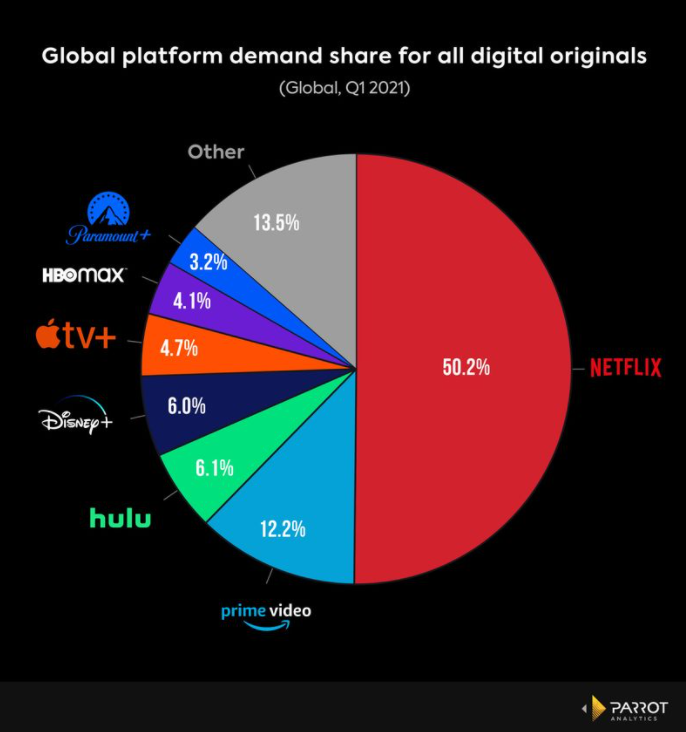

글로벌 OTT 플랫폼 시장의 점유율을 확인해본 결과 Netflix가 독보적인 OTT시장 점유율을 보이며 Amazon Prime, Hulu, Disney plus가 뒤따르고 있습니다.  
2021년, 다른 플랫폼에 비해 늦게 OTT 시장에 뛰어든 디즈니 플러스는 아직까지 수요가 비교적 낮습니다.  
  
&nbsp;
   
저희 조는 **넷플릭스의 데이터를 이용해서, 디즈니 플러스가 시장에 진입하기 위한 전략을 세우라는 요청을 받았다고 가정**하여 프로젝트를 진행해보았습니다.  
  
✔️ 사용하는 데이터의 한계성으로 인해, **'컨텐츠 수요에 대한 정보 = 컨텐츠 공급'** 라고 가정 후 진행했습니다.
  
&nbsp;

---

## 💡 프로젝트 목차

#### 1. 넷플릭스 연도별 장르별 시각화 분석
#### 2. 디즈니 플러스 연도별 장르별 시각화 분석
#### 3. 디즈니플러스의 시장 진입을 위한 콘텐츠 장르 선정
#### 4. 애니메이션 장르의 시장성 예측



## 💡 사용한 데이터
[Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows)  
[Disney+ Movies and TV Shows](https://www.kaggle.com/shivamb/disney-movies-and-tv-shows)  

---
# 1. 넷플릭스 연도별 장르별 시각화 분석

### (1) 라이브러리 준비

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

### (2) 데이터 불러오기

In [5]:
netflix_overall=pd.read_csv("netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


넷플릭스 데이터셋을 살펴본 결과, **시장 점유와 관련된 정보는 콘텐츠가 추가된 양과 관련이 있다고 생각되어, 연도별로 추가된 콘텐츠의 장르**를 먼저 분석해보고자 합니다.  
  
사용하지 않을 rating, cast, duration, director, country, description, release_year 열을 제거해줍니다.

### 데이터 확인

type - 2가지<br>
director - 감독<br>
cast- 배우<br>
country - 국가<br><br>
<b>date_added - 컨텐츠가 넷플릭스에 추가된 날. 작품의 릴리즈와는 다름</b><br><br>
rating - 시청 연령대<br><br>
<b>listed_in - 장르</b><br><br>
release_year - 컨텐츠 출시일<br>
descriptions - 컨텐츠 설명<br>

#### 확인하고자 하는 정보는 넷플릭스 컨텐츠를 통해 어떤 작품이 넷플릭스에 올라갔고 그 장르가 어떤것이냐 <br>
 - 이것을 통해 넷플릭스가 주력으로 삼는 장르를 확인
 - 다른 컬럼은 넷플릭스가 주력으로 생각하는 장르임을 확인하기 어려움.
 - rating의 경우 실제 시청자들의 평가가 아닌 시청 연령대에 대한 정보로 생각할 수 있음.
 

### (3) 데이터 처리

#### - 필요없는 열 삭제

In [6]:
df = netflix_overall.drop(["rating","cast","duration","director","country","description", "release_year"], axis=1 )
df

,show_id,type,title,date_added,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,"September 24, 2021","TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",Children & Family Movies
7,s8,Movie,Sankofa,"September 24, 2021","Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,"September 24, 2021","British TV Shows, Reality TV"
9,s10,Movie,The Starling,"September 24, 2021","Comedies, Dramas"


In [7]:
# information 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 5 columns):
show_id       8807 non-null object
type          8807 non-null object
title         8807 non-null object
date_added    8797 non-null object
listed_in     8807 non-null object
dtypes: object(5)
memory usage: 344.1+ KB


In [8]:
# null 값 제거
df.dropna(axis='index', how = 'any', subset = ['date_added'], inplace=True)
df

,show_id,type,title,date_added,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,"September 24, 2021","TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",Children & Family Movies
7,s8,Movie,Sankofa,"September 24, 2021","Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,"September 24, 2021","British TV Shows, Reality TV"
9,s10,Movie,The Starling,"September 24, 2021","Comedies, Dramas"


프로젝트에 사용할 열들의 데이터 타입을 확인 후 null값을 제거했습니다.
#### - 컬럼명 변경

In [9]:
df.rename(columns = {"date_added":"year"}, inplace = True )
df

,show_id,type,title,year,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021","Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,"September 24, 2021","TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,My Little Pony: A New Generation,"September 24, 2021",Children & Family Movies
7,s8,Movie,Sankofa,"September 24, 2021","Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,"September 24, 2021","British TV Shows, Reality TV"
9,s10,Movie,The Starling,"September 24, 2021","Comedies, Dramas"


In [10]:
# 연도만 추출하기
df["year"]= df["year"].apply(lambda x: x.split(", ")[1]).astype(int)
df

,show_id,type,title,year,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021,Documentaries
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,2021,"TV Dramas, TV Horror, TV Mysteries"
6,s7,Movie,My Little Pony: A New Generation,2021,Children & Family Movies
7,s8,Movie,Sankofa,2021,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,2021,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,2021,"Comedies, Dramas"


date_added를 year로 컬럼명을 변경했습니다.  
콘텐츠 장르에 따른 연도별 현황을 확인하기 위해 연도만 추출하고 월, 일을 제거합니다.

In [11]:
# 확인
type(df.iloc[0]["year"])

numpy.int64

#### - 각 콘텐츠 대표 장르 선별

In [12]:
# 장르 뽑아내기
df["genre"] = df['listed_in'].apply(lambda x: x.split(", ")[0])

In [13]:
df.head()

,show_id,type,title,year,listed_in,genre
0,s1,Movie,Dick Johnson Is Dead,2021,Documentaries,Documentaries
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV",Docuseries
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows


listed_in 컬럼에 속해있는 콘텐츠의 장르는 한 콘텐츠당 최소 하나에서 여러개의 장르가 등록되어있습니다.  
원활한 시각화를 위해 맨 앞에 있는 대표 장르 하나만을 뽑아내고 뒤에 있는 나머지 장르들을 제거해줍니다.

In [14]:
# 최근 콘텐츠들만 선별 # why? the important thing is the trend!
df = df.loc[df['year'] >= 2009]
df

,show_id,type,title,year,listed_in,genre
0,s1,Movie,Dick Johnson Is Dead,2021,Documentaries,Documentaries
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV",Docuseries
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
5,s6,TV Show,Midnight Mass,2021,"TV Dramas, TV Horror, TV Mysteries",TV Dramas
6,s7,Movie,My Little Pony: A New Generation,2021,Children & Family Movies,Children & Family Movies
7,s8,Movie,Sankofa,2021,"Dramas, Independent Movies, International Movies",Dramas
8,s9,TV Show,The Great British Baking Show,2021,"British TV Shows, Reality TV",British TV Shows
9,s10,Movie,The Starling,2021,"Comedies, Dramas",Comedies


최근 5개년의 장르 콘텐츠 트렌드 파악을 위해, 2017년에 추가된 데이터부터 선별했습니다.

In [39]:
# 장르 수 확인
df['year'].unique() 

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2009, 2010])

넷플릭스 콘텐츠의 장르 수는 총 36개 입니다.  

### (4) 장르 index 저장


In [16]:
genre_counts = df['genre'] 

genre_list = genre_counts.value_counts()

netflix_genre_list = genre_list

genre_list = genre_list.index

genre_list, genre_list[:5] # genre_list & top 5 rank genres

(Index(['Dramas', 'Comedies', 'Action & Adventure', 'Documentaries',
        'International TV Shows', 'Children & Family Movies', 'Crime TV Shows',
        'Kids' TV', 'Stand-Up Comedy', 'Horror Movies', 'British TV Shows',
        'Docuseries', 'Anime Series', 'International Movies', 'Reality TV',
        'TV Comedies', 'Classic Movies', 'TV Dramas', 'Thrillers', 'Movies',
        'TV Action & Adventure', 'Stand-Up Comedy & Talk Shows',
        'Romantic TV Shows', 'Anime Features', 'Independent Movies',
        'Classic & Cult TV', 'Music & Musicals', 'TV Shows', 'Sci-Fi & Fantasy',
        'Cult Movies', 'TV Horror', 'Romantic Movies',
        'Spanish-Language TV Shows', 'LGBTQ Movies', 'Sports Movies',
        'TV Sci-Fi & Fantasy'],
       dtype='object'),
 Index(['Dramas', 'Comedies', 'Action & Adventure', 'Documentaries',
        'International TV Shows'],
       dtype='object'))

장르별 콘텐츠 수를 확인한 후, 장르들을 index로 저장했습니다.


### (5) 연도별 콘텐츠 수 확인

In [17]:
grouped = df.groupby('year').count()
year_counts = grouped['genre']
year_counts

year
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: genre, dtype: int64

In [18]:
# 장르별 분리 -> 연도별 counting
#genre_by_year = {}

empty_df = pd.DataFrame()

for i, genre in enumerate(genre_list):

    condition = (df['genre'] == genre)
    temp = df.loc[condition]
    temp = temp.groupby('year')['genre']
    temp = temp.count() / year_counts * year_counts
    
    empty_df[genre] =temp
    
    #genre_by_year[genre] = temp


#empty_df.loc["2022"] = pred

empty_df = empty_df.fillna(0)
empty_df

,Dramas,Comedies,Action & Adventure,Documentaries,International TV Shows,Children & Family Movies,Crime TV Shows,Kids' TV,Stand-Up Comedy,Horror Movies,...,Music & Musicals,TV Shows,Sci-Fi & Fantasy,Cult Movies,TV Horror,Romantic Movies,Spanish-Language TV Shows,LGBTQ Movies,Sports Movies,TV Sci-Fi & Fantasy
year,,,,,,,,,,,,,,,,,,,,,
2009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,1.0,8.0,0.0,4.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,8.0,7.0,2.0,13.0,1.0,11.0,1.0,8.0,12.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2016,53.0,33.0,18.0,68.0,53.0,19.0,19.0,37.0,36.0,4.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,200.0,136.0,97.0,187.0,135.0,77.0,49.0,36.0,62.0,30.0,...,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


각 연도별로 콘텐츠 수를 확인한 후, 장르별로 분리하여 각 장르에 해당하는 연도의 콘텐츠 비율을 뽑았습니다.

### (6) 꺾은선 그래프를 통한 시각화

In [19]:
netflix_genre_list

Dramas                          1599
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           773
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         386
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 252
Docuseries                       220
Anime Series                     175
International Movies             128
Reality TV                       120
TV Comedies                      119
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 20
Music & Musicals                  18
T

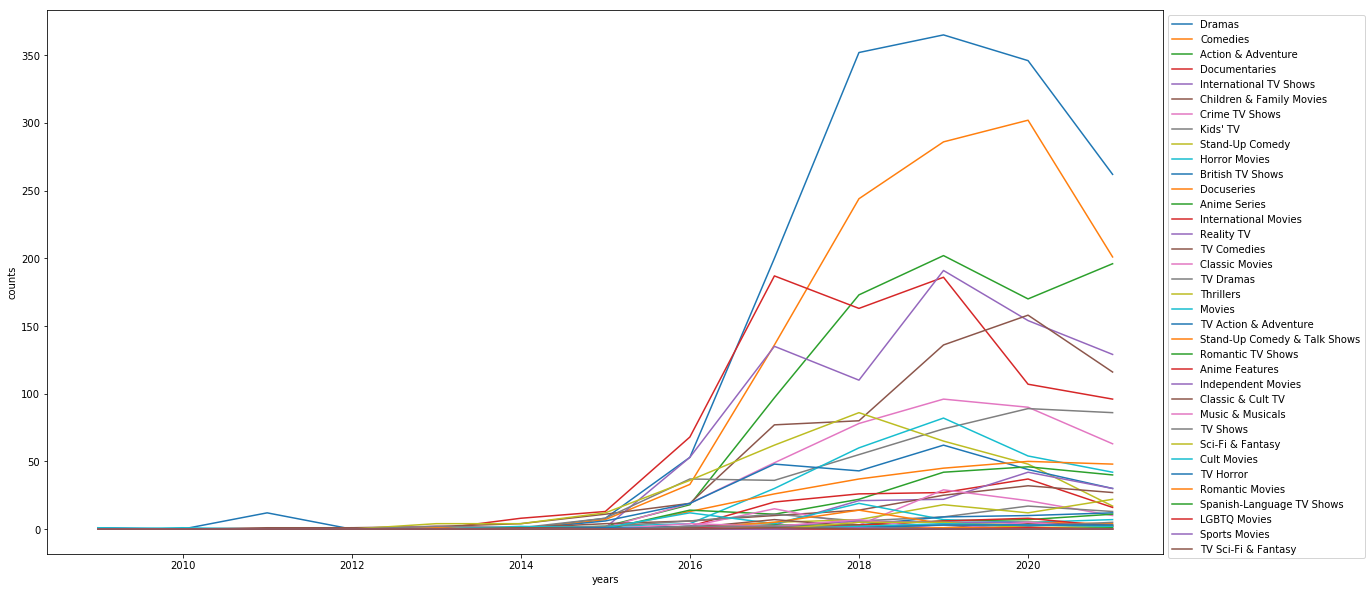

In [20]:
year_list = [i for i in range(2009, 2022)]

%matplotlib inline

plt.figure(figsize = (20,10))

for genre in genre_list:
    plt.plot(year_list, empty_df[genre])


plt.xlabel('years')
plt.ylabel('counts')
plt.xticks = year_list

plt.legend(genre_list, bbox_to_anchor = (1,1))
plt.show()

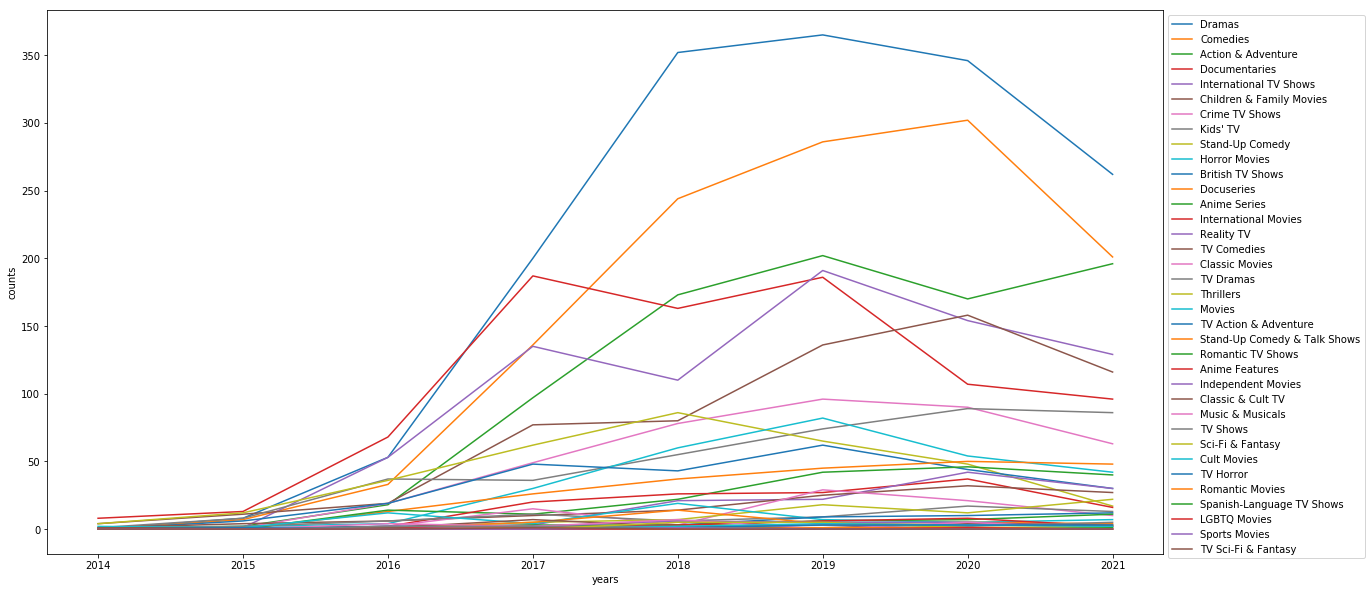

In [21]:
# 수정한거
year_list = [i for i in range(2014,2022)]
test_copy = empty_df.loc[year_list]
%matplotlib inline

plt.figure(figsize = (20,10))

for genre in genre_list:
    plt.plot(year_list, test_copy[genre])


plt.xlabel('years')
plt.ylabel('counts')
plt.xticks = year_list

plt.legend(genre_list, bbox_to_anchor = (1,1))
plt.show()

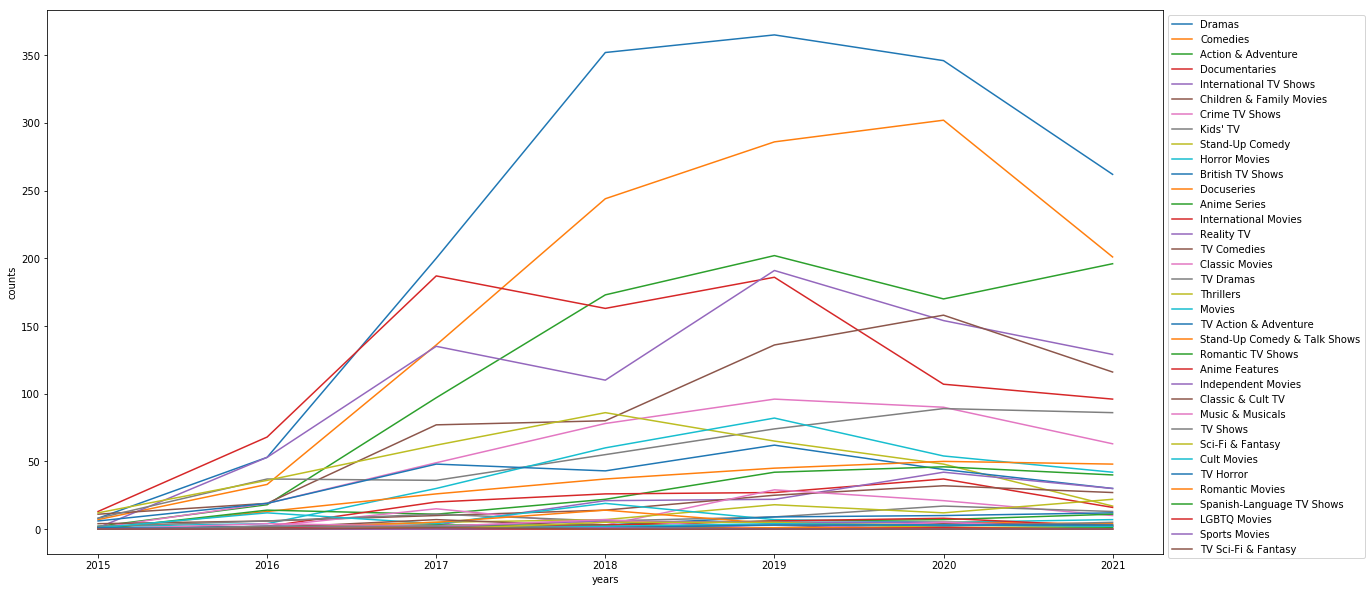

In [22]:
# 수정한거
year_list = [i for i in range(2015,2022)]
test_copy = empty_df.loc[year_list]
%matplotlib inline

plt.figure(figsize = (20,10))

for genre in genre_list:
    plt.plot(year_list, test_copy[genre])


plt.xlabel('years')
plt.ylabel('counts')
plt.xticks = year_list

plt.legend(genre_list, bbox_to_anchor = (1,1))
plt.show()

##### 특정장르의 시장부터 접근하여 시장진입을 확인

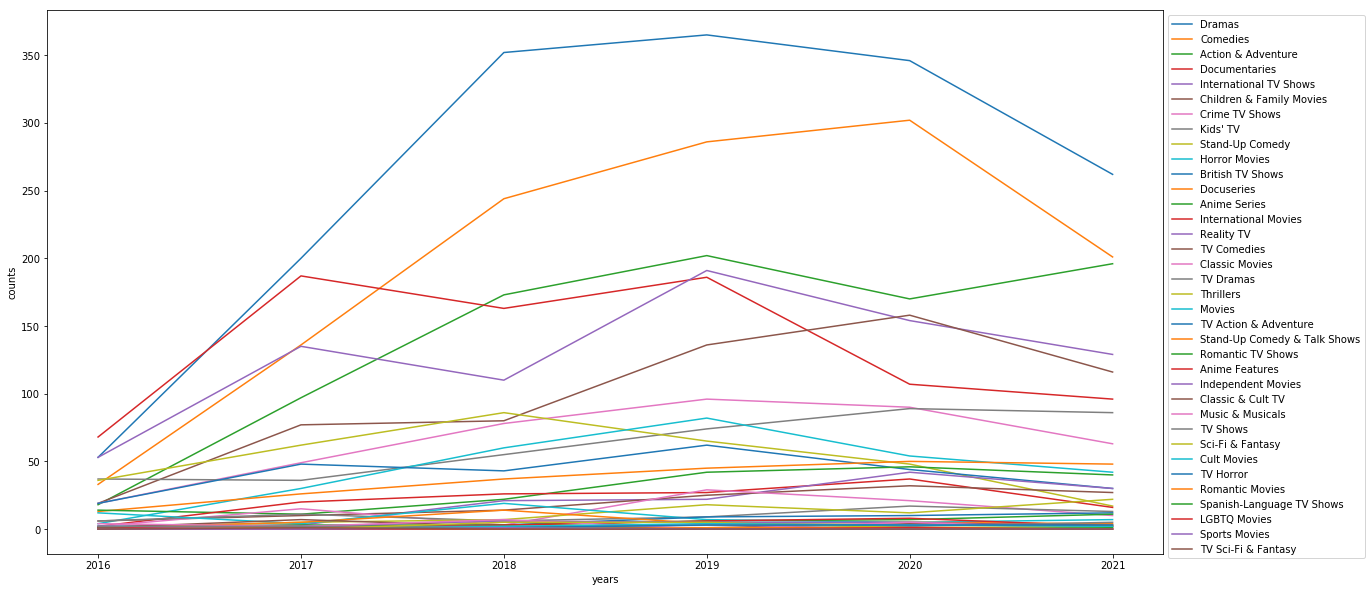

In [23]:
# 수정한거
year_list = [i for i in range(2016,2022)]
test_copy = empty_df.loc[year_list]
%matplotlib inline

plt.figure(figsize = (20,10))

for genre in genre_list:
    plt.plot(year_list, test_copy[genre])


plt.xlabel('years')
plt.ylabel('counts')
plt.xticks = year_list

plt.legend(genre_list, bbox_to_anchor = (1,1))
plt.show()

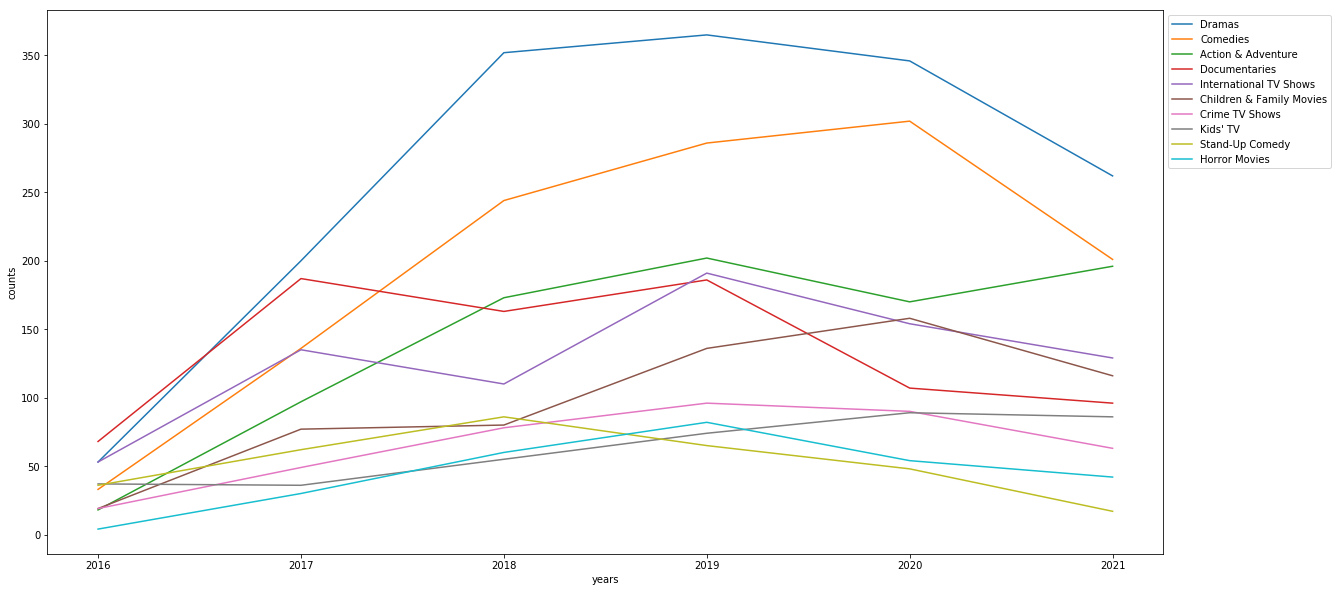

In [24]:
# 수정한거
year_list = [i for i in range(2016,2022)]
test_copy = empty_df.loc[year_list]
%matplotlib inline

plt.figure(figsize = (20,10))

for genre in genre_list[:10]:
    plt.plot(year_list, test_copy[genre])


plt.xlabel('years')
plt.ylabel('counts')
plt.xticks = year_list

plt.legend(genre_list, bbox_to_anchor = (1,1))
plt.show()

이와 같이 넷플릭스에 추가되는 장르별 콘텐츠를 연도별로 시각화 해본 결과, **Drama, Comedies, Action&Adventure, Documentaries, International TV Shows 순으로 넷플릭스가 가장 주력하고 있는 장르**라는 것을 확인 할 수 있습니다.  
위 장르의 콘텐츠들은 넷플릭스가 자신 있고 수요가 많은 콘텐츠라고 생각하기 때문에 타 장르에 비해 많이 추가되었다는 것을 알 수 있습니다.  
  
&nbsp;

저희는 **디즈니 플러스가 글로벌 OTT플랫폼 시장에 진입하기 위해선, 초반의 안정적인 시장 진입을 위해 상대적으로 경쟁이 적은 장르로 틈새시장을 공략하는 것이 좋겠다는 판단**을 했습니다.  
  
이제, 디즈니 플러스의 연도별 장르별 시각화 분석을 통해 디즈니플러스가 주력하고 있는 장르를 확인하고, 넷플릭스와 비교하여 디즈니 플러스가 잘 활용할 수 있는 장르를 선택해보겠습니다.

&nbsp;

# 2. 디즈니 플러스 연도별 장르별 시각화 분석
### (1) 데이터 불러오기

In [25]:
disney = pd.read_csv("disney_plus_titles.csv")
disney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,"November 19, 2021",2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...


### (2) 데이터 처리

In [26]:
def preprocess_data(df):
    df = df[["show_id","title", "type", "date_added","listed_in"]] # 열 추출
    
    df.dropna(axis='index', how = 'any', subset = ['date_added'], inplace=True) # null 제거

    df.rename(columns = {"date_added":"year"}, inplace = True )  # 컬럼명 변경, 연도만 추출

    df["year"]= df["year"].apply(lambda x: x.split(", ")[1]).astype(int) # 연도만 추출하기

    df["genre"] = df['listed_in'].apply(lambda x: x.split(", ")[0]) # 장르 뽑아내기

    df = df.loc[df['year'] >= 2017] # 최근 작픔들만 선별 # why? the important thing is the trend!
    
    return df

In [27]:
disney = preprocess_data(disney)
disney

,show_id,title,type,year,listed_in,genre
0,s1,Duck the Halls: A Mickey Mouse Christmas Special,Movie,2021,"Animation, Family",Animation
1,s2,Ernest Saves Christmas,Movie,2021,Comedy,Comedy
2,s3,Ice Age: A Mammoth Christmas,Movie,2021,"Animation, Comedy, Family",Animation
3,s4,The Queen Family Singalong,Movie,2021,Musical,Musical
4,s5,The Beatles: Get Back,TV Show,2021,"Docuseries, Historical, Music",Docuseries
5,s6,Becoming Cousteau,Movie,2021,"Biographical, Documentary",Biographical
6,s7,Hawkeye,TV Show,2021,"Action-Adventure, Superhero",Action-Adventure
7,s8,Port Protection Alaska,TV Show,2021,"Docuseries, Reality, Survival",Docuseries
8,s9,Secrets of the Zoo: Tampa,TV Show,2021,"Animals & Nature, Docuseries, Family",Animals & Nature
9,s10,A Muppets Christmas: Letters To Santa,Movie,2021,"Comedy, Family, Musical",Comedy


앞서 진행한 넷플릭스 데이터셋을 통한 연도별 장르별 콘텐츠 현황을 시각화 한 것 처럼, 디즈니 플러스 데이터셋도 동일한 전처리를 진행하겠습니다.  
  
- 사용하지 않을 rating, cast, duration, director, country, description, release_year 열 제거
- null값 제거
- year 컬럼명을 변경하고 연도 데이터만 추출
- listed_in 컬럼에 속해있는 장르 중 가장 앞에 있는 장르를 뽑아냄 
- 최근 5개년 장르 콘텐츠 트렌드 파악을 위해, 2017년에 추가된 데이터부터 선별

### (3) 꺾은선 그래프를 통한 시각화

넷플릭스와 달리 Action-Adventure 장르가 가장 많은 콘텐츠라는 것을 알 수 있습니다.  
디즈니 플러스는 29개의 장르로 구성되어있습니다.  
한 눈에 확인하기 위해 연도별로 나누어 시각화해보겠습니다.  

In [28]:
def show_graph(df):
    global temp_genre_list, genre_by_year
    # genre indexing
    genre_counts = df['genre'] 
    genre_list = genre_counts.value_counts()
    temp_genre_list = genre_list
    genre_list = genre_list.index
    print(genre_list)
    
    # year indexing
    grouped = df.groupby('year').count()
    year_counts = grouped['genre']
    print(year_counts)
    
    # year
    year_list = year_counts.index
    print(year_list)
    
    genre_by_year = {}
    
    for genre in genre_list:
    
        condition = (df['genre'] == genre)
        temp = df.loc[condition]
        temp = temp.groupby('year')['genre']
        temp = temp.count() 
    
        genre_by_year[genre] = temp / year_counts * 100
        
    plt.figure(figsize = (20,10))

    for genre in genre_list:
        plt.plot(year_list, genre_by_year.get(genre))   

    plt.xlabel("Years")
    plt.ylabel("Percentages by each year")

    plt.xticks = year_list

    plt.legend(genre_list, bbox_to_anchor = (1,1))
    plt.show()
    
    return df

Index(['Action-Adventure', 'Animation', 'Comedy', 'Animals & Nature',
       'Documentary', 'Coming of Age', 'Biographical', 'Docuseries', 'Drama',
       'Buddy', 'Family', 'Anthology', 'Fantasy', 'Concert Film', 'Reality',
       'Movies', 'Crime', 'Series', 'Science Fiction', 'Historical', 'Musical',
       'Kids', 'Sports', 'Dance', 'Music', 'Talk Show', 'Variety', 'Lifestyle',
       'Game Show / Competition'],
      dtype='object')
year
2019    765
2020    352
2021    330
Name: genre, dtype: int64
Int64Index([2019, 2020, 2021], dtype='int64', name='year')


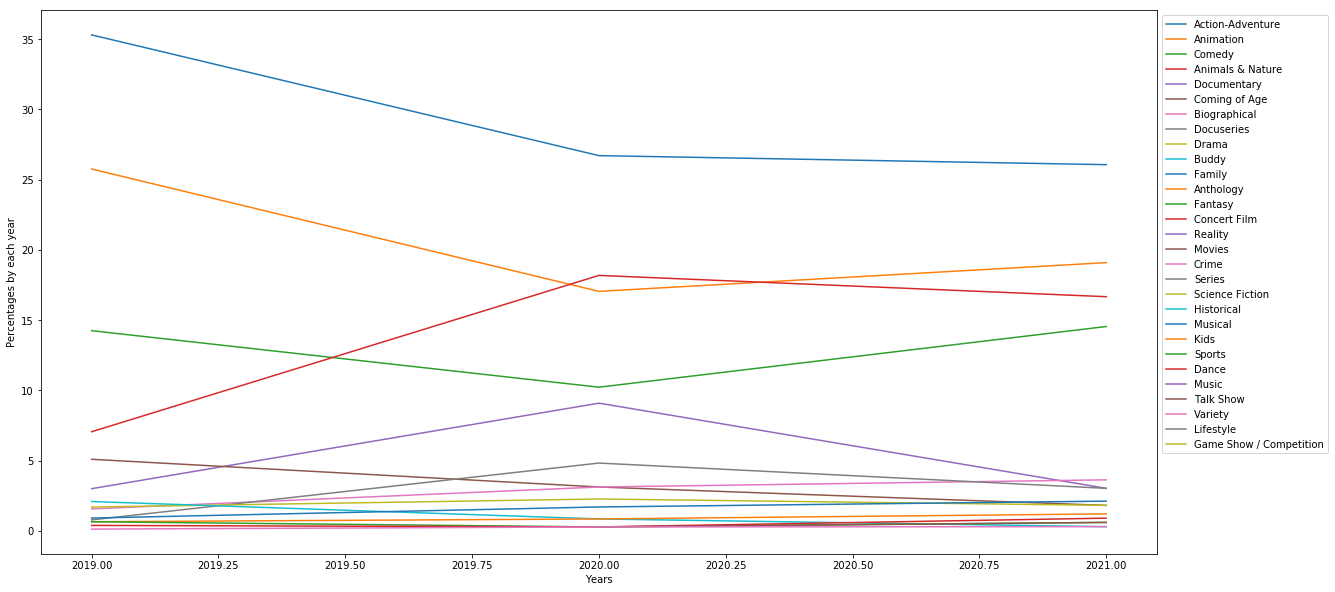

In [29]:
show_graph(disney)
disney_genre_list = temp_genre_list
disney_genre_by_year = genre_by_year

print()

In [30]:
temp_genre_list[:10]

Action-Adventure    450
Animation           320
Comedy              193
Animals & Nature    173
Documentary          65
Coming of Age        56
Biographical         35
Docuseries           33
Drama                27
Buddy                20
Name: genre, dtype: int64

디즈니 플러스에 추가되는 장르별 콘텐츠를 연도별로 시각화 해본 결과, **Action&Adventure, Animation, Comedy, Animal&Nature,  Documentaries 순으로 디즈니 플러스가 가장 주력하고 있는 장르**라는 것을 확인 할 수 있습니다.  

&nbsp;

# 3. 디즈니플러스의 시장 진입을 위한 콘텐츠 장르 선정
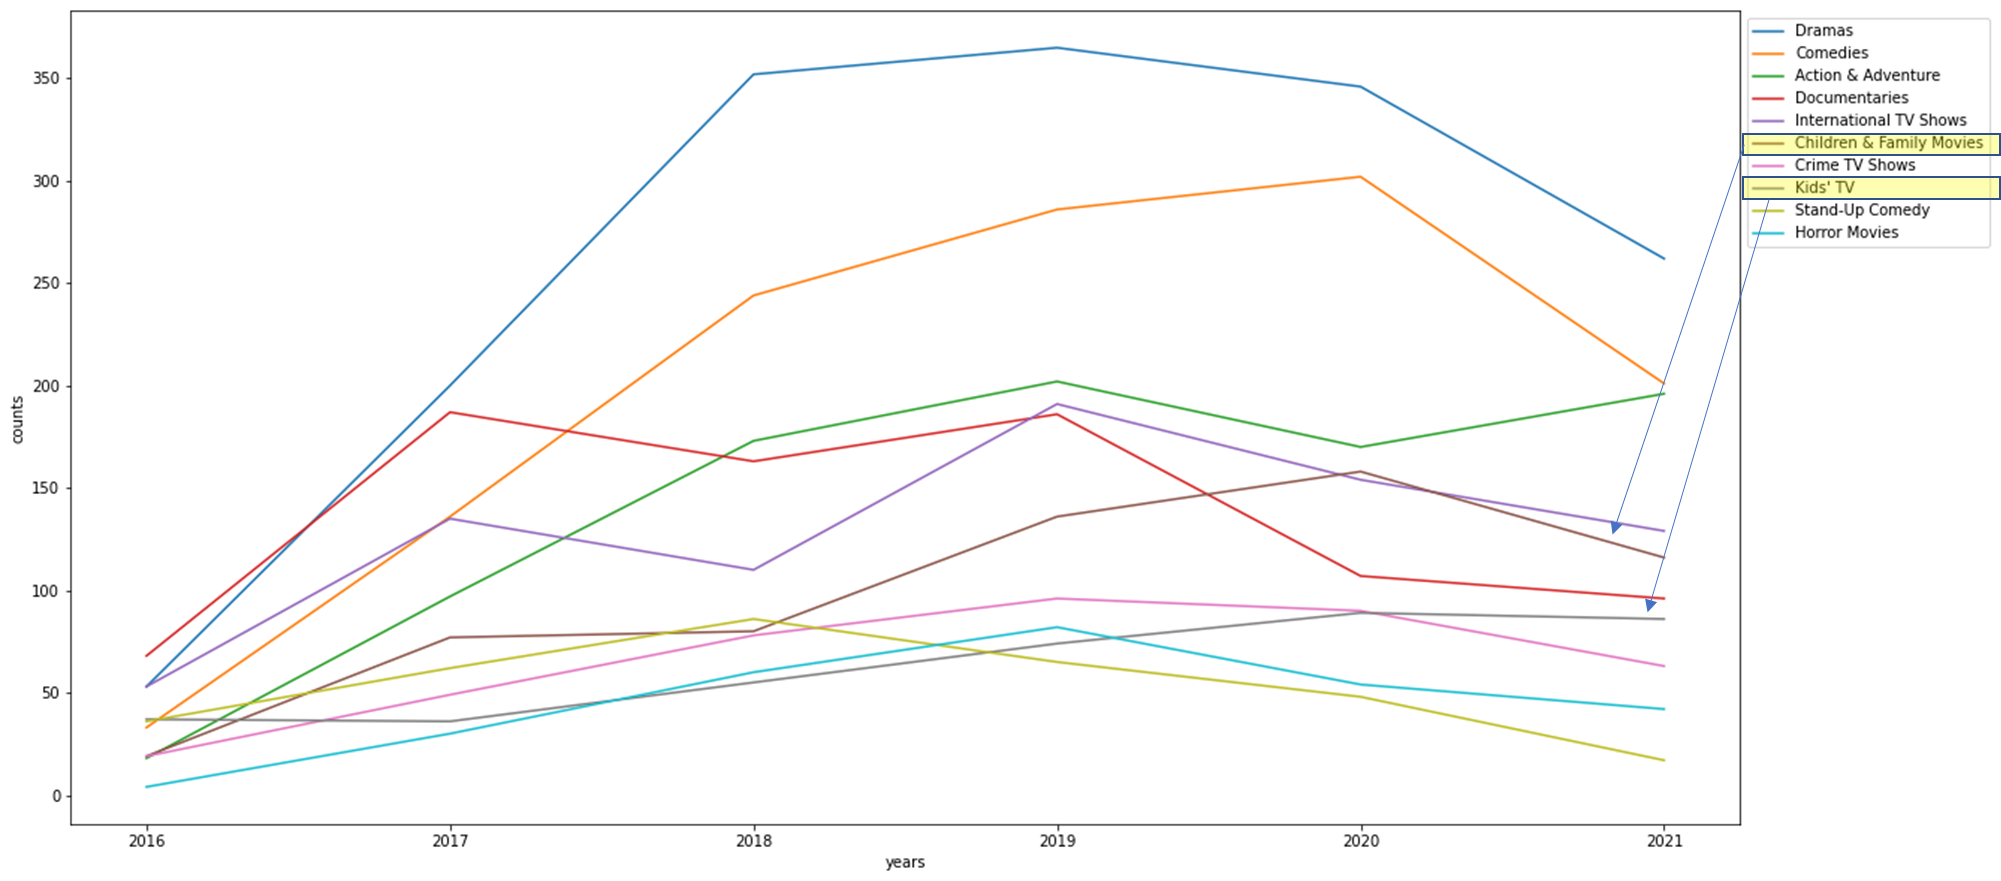
&nbsp;

넷플릭스의 주력 장르가 'Drama, Comedies, Action&Adventure, Documentaries, International TV Shows'인 것을 비교하면, **디즈니 플러스는 현재 주력 콘텐츠인 Kids' TV, Animation, Children & Family Movies 장르를 주력 콘텐츠로 틈새시장을 공략**하는 것이 좋다고 생각합니다.  
  
&nbsp;
  
넷플릭스 장르별 시각화 그래프를 확인했을 때, **Animation장르와 유사한 Anime series는 13위, Anime feature은 25위**로 그다지 넷플릭스에서 주력하지 않은 장르라는 것을 알 수 있습니다.  
또한, 연도별 추이를 보았을때도 최근 5개년동안 급격한 상승 및 하락이 없었던 것으로 보아 크게 주력하지 않는 장르라는 것을 다시 한번 확인 할 수 있습니다.  
  
  
디즈니 플러스는 시장 진입을 위해 초기 경쟁이 적은 장르를 확보하는 것이 유리하며, 더욱이 현재 디즈니 플러스에서 Animation 장르를 주력으로 밀고있다는 것은 해당 장르에 자신이 있으며, 당사에서 많이 보유하고 있는 콘텐츠라는 증거입니다.  
그래서 저희는 **디즈니 플러스가 초기 시장을 진입하여 포지션을 확보하기 위한 장르를 Animation장르로 선정**했습니다.  

&nbsp;

이제 애니메이션 장르가 어느 정도 시장성이 있고, 디즈니 플러스가 애니메이션 장르를 주력으로 밀었을 경우 OTT플랫폼 내에서 어떤 포지션을 확보 할 수 있을지 예측을 통해 확인해보겠습니다.

&nbsp;

# 4. 애니메이션 장르의 시장성 예측
애니메이션 장르의 콘텐츠가 2022년에 어느정도 생성될지에 따라 디즈니 플러스의 OTT 시장 진입 및 안착에 성공할 수 있음을 예측 할 수 있습니다. 

### (1) 예측하기

- TRAIN: 2017~2020(4개) 데이터를 주고 2021을 예측하도록 모델 학습
- TEST: 이후 test에서 2018~2021(4개년) 데이터를 주고 2022를 예측

In [31]:
empty_df

,Dramas,Comedies,Action & Adventure,Documentaries,International TV Shows,Children & Family Movies,Crime TV Shows,Kids' TV,Stand-Up Comedy,Horror Movies,...,Music & Musicals,TV Shows,Sci-Fi & Fantasy,Cult Movies,TV Horror,Romantic Movies,Spanish-Language TV Shows,LGBTQ Movies,Sports Movies,TV Sci-Fi & Fantasy
year,,,,,,,,,,,,,,,,,,,,,
2009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,1.0,8.0,0.0,4.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,8.0,7.0,2.0,13.0,1.0,11.0,1.0,8.0,12.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2016,53.0,33.0,18.0,68.0,53.0,19.0,19.0,37.0,36.0,4.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,200.0,136.0,97.0,187.0,135.0,77.0,49.0,36.0,62.0,30.0,...,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
train_x=[]
for genre in empty_df:
    values = list(empty_df[genre])
    train_x.append(values[-5:-1])

train_x = np.array(train_x)
train_x = np.nan_to_num(train_x)

train_x.shape # (36,4)로, 36개 특징에 대해 4년(2017~2020) 간의 데이터 제공

(36, 4)

In [33]:
test_x=[]
for genre in empty_df:
    values = list(empty_df[genre])
    test_x.append(values[-1])

test_x = np.array(test_x)
test_x = np.nan_to_num(test_x)

test_x.shape # (36,1)로, 36개 특징에 대해 1년(2021) 간의 데이터 제공

(36,)

In [34]:
train_Y=[]
for genre in empty_df:
    values = list(empty_df[genre])
    train_Y.append(values[-4:])

train_Y = np.array(train_Y)
train_Y = np.nan_to_num(train_Y)

train_Y.shape # (36,4)로, 36개 특징에 대해 4년(2018~2021) 간의 데이터 제공

(36, 4)

### (2) 결과 시각화

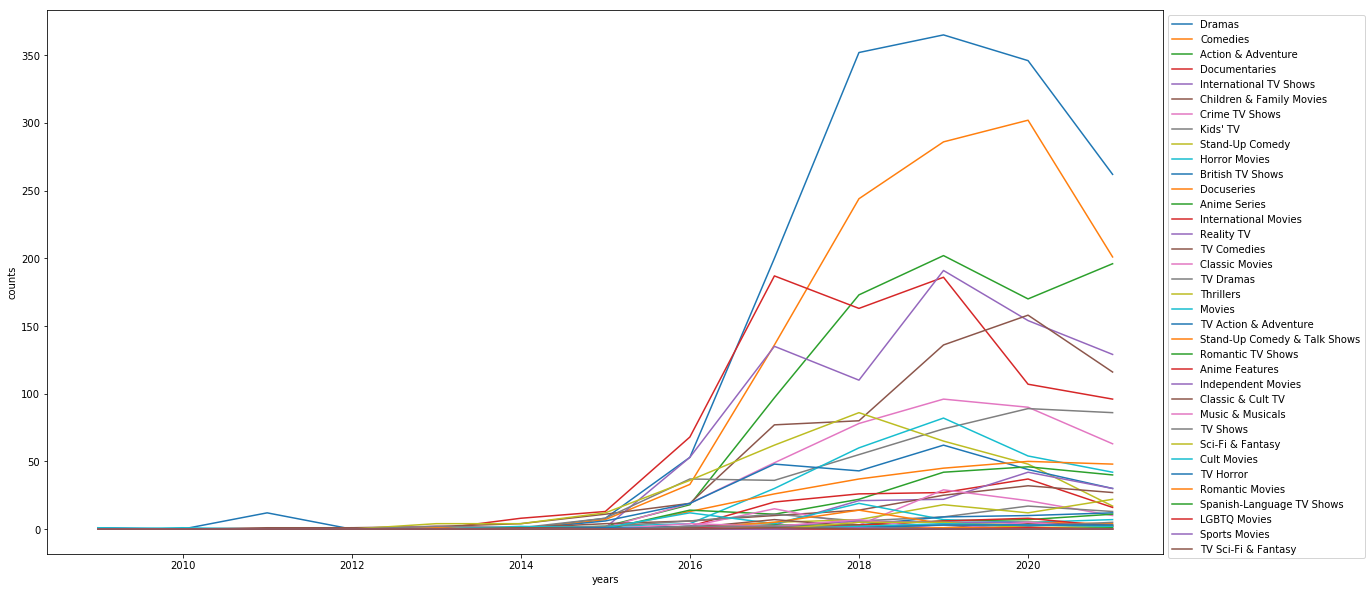

In [35]:
# 수정한거
year_list = [i for i in range(2009, 2022)]

%matplotlib inline

plt.figure(figsize = (20,10))

for genre in genre_list:
    plt.plot(year_list, empty_df[genre])

plt.xlabel('years')
plt.ylabel('counts')
plt.xticks = year_list


plt.legend(genre_list, bbox_to_anchor = (1,1))
plt.show()

### (3) 모델 학습하기

In [36]:
from sklearn.linear_model import LinearRegression
import tensorflow as tf

tf.set_random_seed(2)

model = LinearRegression()

model.fit(train_x, test_x) # (18 ~ 21)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
pred = model.predict(train_Y) # 2018, 2019, 2020, 2021
pred =list(pred) # 2022년의 데이터
pred

[166.50246433221474,
 173.33304461116973,
 88.76460231665138,
 20.518753694700937,
 92.2677611078326,
 115.21621261858394,
 49.11663024831446,
 64.57195226372852,
 3.3670322050851373,
 21.308445362321997,
 20.212676488339266,
 33.6601423707564,
 35.51700205965225,
 23.937286036449294,
 33.63574708700081,
 26.149971441407097,
 17.241249358198054,
 15.530255596077641,
 10.26755416546447,
 -2.1035301829601045,
 9.950220208758424,
 0.04403550236370135,
 7.373439815839193,
 7.032704819349461,
 3.022064681964809,
 4.509777778446049,
 3.0497768880822758,
 2.582286362423,
 -0.38894525952573966,
 2.9596472949414494,
 3.679801098548491,
 2.051812813544603,
 0.9585509460928734,
 2.2005354417547522,
 0.8140811865564851,
 1.2410426024169894]

In [38]:
# 장르별 분리 -> 연도별 counting

empty_df.loc["2022"] = pred
empty_df

,Dramas,Comedies,Action & Adventure,Documentaries,International TV Shows,Children & Family Movies,Crime TV Shows,Kids' TV,Stand-Up Comedy,Horror Movies,...,Music & Musicals,TV Shows,Sci-Fi & Fantasy,Cult Movies,TV Horror,Romantic Movies,Spanish-Language TV Shows,LGBTQ Movies,Sports Movies,TV Sci-Fi & Fantasy
year,,,,,,,,,,,,,,,,,,,,,
2009,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014,0.000000,0.000000,1.000000,8.000000,0.000000,4.000000,1.00000,1.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015,8.000000,7.000000,2.000000,13.000000,1.000000,11.000000,1.00000,8.000000,12.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016,53.000000,33.000000,18.000000,68.000000,53.000000,19.000000,19.00000,37.000000,36.000000,4.000000,...,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017,200.000000,136.000000,97.000000,187.000000,135.000000,77.000000,49.00000,36.000000,62.000000,30.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


# 5. 넷플릭스 데이터 분석을 바탕으로 디즈니 플러스의 전략 제시
넷플릭스가 주력하고 있지는 않지만 작품 수가 증가하고 있는 'Kids' TV, Animation, Children & Family Movies' 장르의 콘텐츠를 추가합니다. 


더 많은 데이터 확보한 후에는 모델을 통한 정확한 예측을 할 수 있으므로, 디즈니 플러스가 다음 해에 주력해야 할 장르를 미리 제작 및 추가할 수 있습니다.


---
### 보완점 😳
1. 데이터 부족
 - 2009 ~ 2021년 데이터 확보 가능했으나, 사실상 2015년까지는 넷플릭스 장르별 작품수가 적었기에 null value가 많았습니다.
 - 이후 크롤링 및 추가 데이터 확보로 보완할 수 있을 것 같습니다.


2. 예측 모델 
 - Linear Regression만 사용해보았지만, 추후 더 적절한 회귀분석 모델로 예측해볼 수 있을 것 같습니다.